# CÓDIGO DE CORTE DOS MAPAS DE RAZÃO Th/K
#### por Phillipe Lima

-Todos os mapas foram retirados da [base de dados da CPRM](http://geosgb.cprm.gov.br/downloads/)

Importando as bibliotecas

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib inline

###  FUNÇÃO PARA CORTAR OS MAPAS
-Função que fatia uma imagem em diversas outras com o tamanho selecionado

In [9]:
def cortar(path, size_y, size_x, pcent=50):
    mapa = cv2.imread(path)
    ver_img = mapa.shape[0] // size_y    
    hor_img = mapa.shape[1] // size_x   
    for y in range(ver_img):
        for x in range(hor_img):
            img = mapa[size_y*y:size_y*(y+1), size_x*x:size_x*(x+1)]
            if np.mean(img) != 255:                                          #condição para eliminar imagens totalmente brancas
                cv2.imwrite("{}_{}{}.jpg".format(path[-17:-13], y, x), img)
    if mapa.shape[0] % size_y > size_y*pcent/100:                            #condição para pegar o que sobrou em y
        for x in range(hor_img):
            img = mapa[-size_y-1:-1, size_x*x:size_x*(x+1)]
            if np.mean(img) != 255:
                cv2.imwrite("{}_ry_{}.jpg".format(path[-17:-13], x), img)
    if mapa.shape[1] % size_x > size_x*pcent/100:                            #condição para pegar o que sobrou em x
        for y in range(ver_img):
            img = mapa[size_y*y:size_y*(y+1), -size_x-1:-1]
            if np.mean(img) != 255:
                cv2.imwrite("{}_rx_{}.jpg".format(path[-17:-13], y), img)

### SELECIONANDO AS IMAGENS(.tif)
-Selecionar todos os diretórios com .tif dos mapas baixados

-Selecionar e criar uma variável com todos os diretórios dos mapas de razão Th/K selecionados anteriormente

In [10]:
addresses_tif = glob.glob('C:/Users/Ricardo/Desktop/IC/Arquivos/**/*.tif', recursive=True)   #pegando todos os .tif das pastas

addresses = []
for item in addresses_tif:                                          #pegando só os THKRAZAO dos .tif selecionados
    if 'THKRAZAO' in item:
        addresses.append(item)

addresses = []
for item in addresses_tif:                                          #pegando só os THKRAZAO (mapas de razão Th/K) dos .tif selecionados
    if 'THKRAZAO' in item:
        addresses.append(item)

addresses

['C:/Users/Ricardo/Desktop/IC/Arquivos\\1054\\1054_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1055\\1055_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1056\\1056_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1058\\1058_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1059\\1059_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1064\\1064_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1066\\1066_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1067\\1067_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1068\\1068_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1069\\1069_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1070\\1070_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1072\\1072_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1075\\1075_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1076\\1076_THKRAZAO.tif',
 'C:/Users/Ricardo/Desktop/IC/Arquivos\\1077\\1077_THKRAZAO.tif',
 'C:/Users

In [4]:
print('Temos ao todo {} mapas radiométricos de razão Th/K'.format(len(addresses)))

Temos ao todo 48 mapas radiométricos de razão Th/K


### CORTANDO AS IMAGENS

-Varrendo cada mapa (diretório) e cortando-os

In [11]:
for address in addresses:                                        #varrendo cada THKRAZAO.tif e cortando
    cortar(address, 200, 200)

### EXEMPLO

-Mapa de razão Th/K sem corte

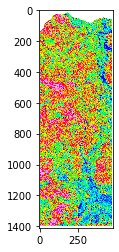

In [12]:
impath = 'C:/Users/Ricardo/Desktop/IC/Arquivos/1066/1066_THKRAZAO.tif'
mapa = cv2.imread(impath)
mapa_rgb = cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB)

plt.imshow(mapa_rgb)
plt.show()

-Imagens resultantes do mapa de razão Th/K anterior cortado

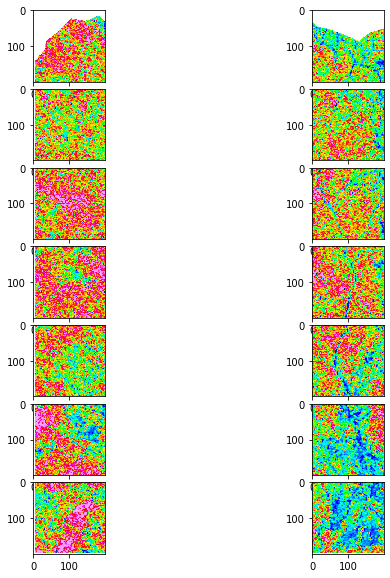

In [13]:
#cortar(impath, 200, 200)

fig, axes = plt.subplots(7, 2)
fig.subplots_adjust(hspace=0.1, wspace=0)
fig.set_figheight(10)
fig.set_figwidth(10)
count = 1
for y in range(0, 7):
    for x in range(0, 2):
        plt.subplot(7, 2, count)
        im = cv2.imread('C:/Users/Ricardo/Desktop/IC/Metodo1/razaoThK/codigos/1066_{}{}.jpg'.format(y, x)) 
        imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(imrgb)
        count += 1

plt.show()